![header](../figures/logos_partenaires_DC_WOC-ESA.jpg)

# Velocity metrics package illustration (Agulhas, BFNQG)
 

***
**Authors:** Datlas <br>
**Copyright:** 2023 Datlas <br>
**License:** MIT

<div class="alert alert-block alert-success">
<h1><center>Agulhas: BFNQG currents maps</center></h1>
 <h5><center> The notebook aims to illustrate how to run the velocity metrics. Here, the example uses surface current maps produced by the BFN-QG in the Agulhas region.</center></h5> 

In [1]:
import velocity_metrics.lagrangian.drifters as drifters
import velocity_metrics.lagrangian.cumulative_distance as sde
import velocity_metrics.utils.constant as const  

# Parameters

### Output directory

In [2]:
outputdir = '../results/metrics_illustration/'

### Evaluated maps parameters

In [3]:
path_dict_product =  '../nb_run_metrics/data_type_metric_illustration_bfnqg.json'  

depth = 0

### Region parameters

In [4]:
path_dict_region = '../nb_run_metrics/region_metric_illustration_Agulhas.json'

### Advection parameters

In [5]:
path_drifter_param = '../nb_run_metrics/drifters_parameters.ini'

path_drifter_position = '../dc_data/lagrangian_position_pickle/Fictive_pos_Drifters_AOML_region_T1_00m_20190101T000000Z_20200101T000000Z.json' 

advection_days = 10

# 1. Advect drifters 

In [6]:
%%time
_ = drifters.run_all_load_once(path_drifter_param, 
                 path_dict_product,
                 path_drifter_position,
                 days_of_advection=advection_days, 
                 output_dir=outputdir,
                 region=path_dict_region, 
                 first_date='20190101T000000Z',
                 last_date='20190201T000000Z',
                 sdepth=depth)

Percent: [#############################-] 96.77%, , 

100%|██████████| 2340/2340 [02:19<00:00, 16.76it/s]
Saving pickle in ../results/metrics_illustration/data_type_metric_illustration_bfnqg_region_metric_illustration_Agulhas.pyo


CPU times: user 1min 57s, sys: 4.63 s, total: 2min 1s
Wall time: 2min 21s


# 2. Compute SDE

In [7]:
drifter_list = ['../dc_data/drifter_pickle/Drifters_AOML_region_T1_00m_20190101T000000Z_20200101T000000Z.pyo']
path_artificial_drifters = outputdir+'data_type_metric_illustration_bfnqg_region_metric_illustration_Agulhas.pyo'
outputfilename = 'SDE_region_T1'

_ = sde.run(path_artificial_drifters, drifter_list, output_dir=outputdir, output_filename=outputfilename)

  0%|          | 0/193 [00:00<?, ?it/s]/Users/sammymetref/Documents/DataChallenges/Metrics_package/velocity_metrics/velocity_metrics/lagrangian/cumulative_distance.py:152: RuntimeWarning: Mean of empty slice
  meansde = numpy.nanmean(sde[:-1, :], axis=1)
/Users/sammymetref/miniconda3/lib/python3.6/site-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/Users/sammymetref/Documents/DataChallenges/Metrics_package/velocity_metrics/velocity_metrics/lagrangian/cumulative_distance.py:154: RuntimeWarning: All-NaN slice encountered
  minsde = numpy.nanmin(sde[:-1, :], axis=1)
/Users/sammymetref/Documents/DataChallenges/Metrics_package/velocity_metrics/velocity_metrics/lagrangian/cumulative_distance.py:155: RuntimeWarning: All-NaN slice encountered
  maxsde = numpy.nanmax(sde[:-1, :], axis=1)
/Users/sammymetref/miniconda3/lib/python3.6/site-packages/numpy/lib/nanfunctions.py:1114: RuntimeWarning: All-NaN slice encountered
  overwrite

# 3. Plot SDE

<Figure size 432x288 with 0 Axes>

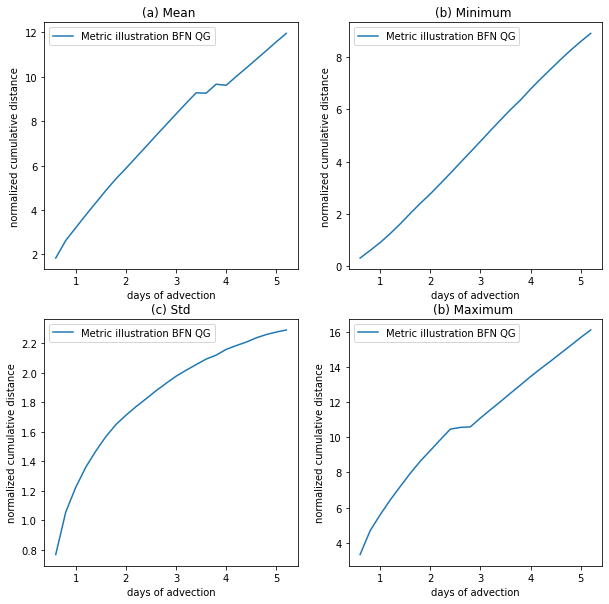

In [8]:
list_sde = [outputdir+'SDE_region_T1_BFNQG1.pyo']
outputfilename = 'SDE_BFNQG_region_T1.png'

_ = sde.plot(list_sde, output_dir=outputdir, output_filename=outputfilename)